# Assignment Instruction

This is Part 2 of assignment 2. It amounts to 50 percent of the grade.

In this part of the assignment, you will scrape a government site. The site we will look at is the [Petitions](https://petition.parliament.uk/).





The particular category of petitions we will look at are ones with government responses. When the number of signatures exceeds 10,000, the government has to respond. The initial url is [https://petition.parliament.uk/petitions?state=with_response](https://petition.parliament.uk/petitions?state=with_response). There are 224 such petitions (as of 10 Nov, 2020). We scrape the information and construct the data.


# Load packages

In [1]:
from urllib.request import urlopen 
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the following information from the first page (20 points)

On the page (https://petition.parliament.uk/petitions?state=with_response), there are 50 most recent petitions. From this webpage, extract the following information.

1. Get the titles of 50 petitions on this page. 
2. Extract the number of signatures, and convert the text to integers
3. Extract the government responded date.
4. Combine all these fields to create a DataFrame.

In [2]:
url = "https://petition.parliament.uk/petitions?state=with_response"

html = urlopen(url)

In [3]:
bs = BeautifulSoup(html, "html.parser")

In [4]:
#retriving signature headers

headers = [item.get_text().strip() for item in bs.select('li h2')]
headers, len(headers)

(['Allow corporate worship and congregational singing at places of worship',
  'Reduce VAT to 5% for the Hair & Beauty Industry inline with Hospitality.',
  'Delay implementation of IR35 legislation reform until COVID-19 is resolved',
  'Do not require salons to close due to Covid-19',
  'Review state pension entitlements for all women who may have been underpaid',
  'Make wearing face masks mandatory in secondary schools and colleges.',
  'Implement sanctions against the Nigerian Government and officials',
  'Hold a public inquiry into Government contracts granted during Covid-19',
  'End child food poverty – no child should be going hungry',
  'Add Crohn’s & Colitis to the Medically Exempt Certificate',
  'Enshrine the Military Covenant in UK Law',
  'Rule out ending the transition period without a deal',
  'We the British People Request a Public Inquiry into Grooming Gangs',
  'Create a Minister for Hospitality in the UK Government',
  'Add Bulgaria to list of countries you can visi

In [5]:
#converting signatures into int

sig_count = [item.get_text().strip() for item in bs.select('.count')]
sig_count = str(sig_count)
sig_count = sig_count.replace(",", "")
sig_count = sig_count.replace("'", "")
sig_count = sig_count.replace("[", "")
sig_count = sig_count.replace("]", "")
sig_count = sig_count.split(" ")
sig_count = list(map(int, sig_count))

sig_count

[32532,
 15132,
 13979,
 27522,
 12694,
 10617,
 220339,
 113713,
 1102990,
 13501,
 67932,
 11464,
 20207,
 39854,
 10381,
 22209,
 10259,
 20103,
 165123,
 11804,
 13855,
 614828,
 14657,
 25339,
 11277,
 42103,
 11058,
 200051,
 19951,
 102481,
 167039,
 57269,
 14339,
 87948,
 21745,
 44887,
 145686,
 11931,
 11102,
 17427,
 71759,
 10284,
 10419,
 125628,
 134857,
 11402,
 21708,
 10593,
 11482,
 26392]

In [6]:
#using regular expression to extract dates from text 

date_obj = (r"\d+\s\w+\s\d+")
responsebs = [item.get_text().strip() for item in bs.select('h2+p')]
response_str =str(responsebs)
response_lst_final = []

dates = re.finditer(date_obj, response_str, re.I)
for date in dates:
    response_lst_final.append(date.group())
response_lst_final


['20 November 2020',
 '20 November 2020',
 '20 November 2020',
 '18 November 2020',
 '18 November 2020',
 '12 November 2020',
 '11 November 2020',
 '11 November 2020',
 '11 November 2020',
 '10 November 2020',
 '9 November 2020',
 '6 November 2020',
 '5 November 2020',
 '3 November 2020',
 '3 November 2020',
 '4 November 2020',
 '4 November 2020',
 '4 November 2020',
 '30 October 2020',
 '30 October 2020',
 '29 October 2020',
 '28 October 2020',
 '28 October 2020',
 '27 October 2020',
 '27 October 2020',
 '27 October 2020',
 '21 October 2020',
 '21 October 2020',
 '20 October 2020',
 '20 October 2020',
 '20 October 2020',
 '19 October 2020',
 '19 October 2020',
 '16 October 2020',
 '15 October 2020',
 '15 October 2020',
 '14 October 2020',
 '17 November 2020',
 '13 October 2020',
 '12 October 2020',
 '12 October 2020',
 '9 October 2020',
 '8 October 2020',
 '8 October 2020',
 '7 October 2020',
 '6 October 2020',
 '7 October 2020',
 '10 November 2020',
 '5 October 2020',
 '17 November 2

In [7]:
df_petition = pd.DataFrame(headers, columns = ["Petition"])
df_petition["signature_count"] = sig_count
df_petition["response_date"] = response_lst_final 

df_petition

,Petition,signature_count,response_date
0,Allow corporate worship and congregational sin...,32532,20 November 2020
1,Reduce VAT to 5% for the Hair & Beauty Industr...,15132,20 November 2020
2,Delay implementation of IR35 legislation refor...,13979,20 November 2020
3,Do not require salons to close due to Covid-19,27522,18 November 2020
4,Review state pension entitlements for all wome...,12694,18 November 2020
5,Make wearing face masks mandatory in secondary...,10617,12 November 2020
6,Implement sanctions against the Nigerian Gover...,220339,11 November 2020
7,Hold a public inquiry into Government contract...,113713,11 November 2020
8,End child food poverty – no child should be go...,1102990,11 November 2020
9,Add Crohn’s & Colitis to the Medically Exempt ...,13501,10 November 2020


# Extract government responses (10 points)

Now, let's extract the response quotes from the government. There are several paragraphs in the response, but you are expected to extract the quote from the response. The responses are not on the same page, but is in the pages linked from the list of petitions. 

The steps will be:

1. Get the urls of each page linked from the title text
2. Visit each page, extract the response text
3. Clean up the text


In [8]:
#getting Urls
ind_url = ["https://petition.parliament.uk" + item['href'] for item in bs.select('h2 a')]
ind_url, len(ind_url)

(['https://petition.parliament.uk/petitions/548621?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/554470?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/552730?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/555408?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/334388?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/330227?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/554150?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/328408?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/554276?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/328047?reveal_response=yes#response-threshold',
  'https://petition.parliament.uk/petitions/332503?reveal_response=yes#response-

In [9]:
df_petition["webpage_link"] = ind_url 
df_petition 

,Petition,signature_count,response_date,webpage_link
0,Allow corporate worship and congregational sin...,32532,20 November 2020,https://petition.parliament.uk/petitions/54862...
1,Reduce VAT to 5% for the Hair & Beauty Industr...,15132,20 November 2020,https://petition.parliament.uk/petitions/55447...
2,Delay implementation of IR35 legislation refor...,13979,20 November 2020,https://petition.parliament.uk/petitions/55273...
3,Do not require salons to close due to Covid-19,27522,18 November 2020,https://petition.parliament.uk/petitions/55540...
4,Review state pension entitlements for all wome...,12694,18 November 2020,https://petition.parliament.uk/petitions/33438...
5,Make wearing face masks mandatory in secondary...,10617,12 November 2020,https://petition.parliament.uk/petitions/33022...
6,Implement sanctions against the Nigerian Gover...,220339,11 November 2020,https://petition.parliament.uk/petitions/55415...
7,Hold a public inquiry into Government contract...,113713,11 November 2020,https://petition.parliament.uk/petitions/32840...
8,End child food poverty – no child should be go...,1102990,11 November 2020,https://petition.parliament.uk/petitions/55427...
9,Add Crohn’s & Colitis to the Medically Exempt ...,13501,10 November 2020,https://petition.parliament.uk/petitions/32804...


In [10]:
def extract_more(url):
  print("fetching: " + url)
  bs = BeautifulSoup(urlopen(url), 'html.parser')
  gov_response_text = bs.select('blockquote p') 
  return(gov_response_text)

response_text_fetched = [extract_more(url) for url in ind_url]
print(response_text_fetched)

fetching: https://petition.parliament.uk/petitions/548621?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/554470?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/552730?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/555408?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/334388?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/330227?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/554150?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/328408?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/554276?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/328047?reveal_response=yes#response-threshold
fetching: https://petition.par

In [11]:
#cleaning up text using string editing method

response_text_fetched = str(response_text_fetched) 
response_text_fetched = response_text_fetched.replace("],", "   ")
response_text_fetched = response_text_fetched.replace("[", "")
response_text_fetched = response_text_fetched.replace("<p>", "")
response_text_fetched = response_text_fetched.replace("</p>", "")
response_text_fetched = response_text_fetched.split("   ")
response_text_fetched


['Places of worship can remain open for individual prayer but cannot open for communal worship. Congregational singing is not permitted., Regulations will be reviewed before expiring on 2 December. \n',
 ' The Government has announced a significant support package to help businesses affected by Covid-19. While there are no plans to extend the scope of the reduced rate, we keep all taxes under review.',
 '  The Government has already delayed this reform until April 2021 in response to COVID-19. The legislation has now received Royal Assent.',
 ' From 5 November, new national restrictions will be in place in England which will require non-medical close contact services to close, apart from for click and collect retail.',
 '  The Government is checking State Pension records. Where it is identified that someone is being underpaid, any backdated State Pension due in accordance with what the law allows will be paid.',
 ' Our approach to face coverings is based on current evidence. Under nati

In [12]:

df_petition["response_text"] = response_text_fetched
df_petition

,Petition,signature_count,response_date,webpage_link,response_text
0,Allow corporate worship and congregational sin...,32532,20 November 2020,https://petition.parliament.uk/petitions/54862...,Places of worship can remain open for individu...
1,Reduce VAT to 5% for the Hair & Beauty Industr...,15132,20 November 2020,https://petition.parliament.uk/petitions/55447...,The Government has announced a significant su...
2,Delay implementation of IR35 legislation refor...,13979,20 November 2020,https://petition.parliament.uk/petitions/55273...,The Government has already delayed this refo...
3,Do not require salons to close due to Covid-19,27522,18 November 2020,https://petition.parliament.uk/petitions/55540...,"From 5 November, new national restrictions wi..."
4,Review state pension entitlements for all wome...,12694,18 November 2020,https://petition.parliament.uk/petitions/33438...,The Government is checking State Pension rec...
5,Make wearing face masks mandatory in secondary...,10617,12 November 2020,https://petition.parliament.uk/petitions/33022...,Our approach to face coverings is based on cu...
6,Implement sanctions against the Nigerian Gover...,220339,11 November 2020,https://petition.parliament.uk/petitions/55415...,We were concerned by violence during recent p...
7,Hold a public inquiry into Government contract...,113713,11 November 2020,https://petition.parliament.uk/petitions/32840...,"The National Audit Office, the public spendin..."
8,End child food poverty – no child should be go...,1102990,11 November 2020,https://petition.parliament.uk/petitions/55427...,We thank Marcus Rashford for highlighting the...
9,Add Crohn’s & Colitis to the Medically Exempt ...,13501,10 November 2020,https://petition.parliament.uk/petitions/32804...,We understand the long-term difficulties of t...


# Repeat the process for the older petitions and save (10 points)

The first page contains the 50 petitions. Repeat the process above and get the information on all petitions. Once finished, combine the dataframes from each page and then save the data into a csv-file.


In [13]:
#getting list of urls needed, formating them correctly 

list_urls = []

for i in range(1,6):
    list_urls.append(["https://petition.parliament.uk/petitions?page="+str(i)+"&state=with_response"])

list_urls = str(list_urls)
list_urls = list_urls.replace("[[", "")
list_urls = list_urls.replace("[", "")
list_urls = list_urls.replace("]", "")
list_urls = list_urls.replace("]]", "")
list_urls = list_urls.replace("'", "")
list_urls = list_urls.split(", ")

list_urls


['https://petition.parliament.uk/petitions?page=1&state=with_response',
 'https://petition.parliament.uk/petitions?page=2&state=with_response',
 'https://petition.parliament.uk/petitions?page=3&state=with_response',
 'https://petition.parliament.uk/petitions?page=4&state=with_response',
 'https://petition.parliament.uk/petitions?page=5&state=with_response']

In [14]:
def extract_info(url):
    print(url)
    html = urlopen(url)
    bs = BeautifulSoup(html, "html.parser")
  # extract information
    headers = [item.get_text().strip() for item in bs.select('li h2')]
    
    sig_count = [item.get_text().strip() for item in bs.select('.count')]
    sig_count = str(sig_count)
    sig_count = sig_count.replace(",", "")
    sig_count = sig_count.replace("'", "")
    sig_count = sig_count.replace("[", "")
    sig_count = sig_count.replace("]", "")
    sig_count = sig_count.split(" ")
    sig_count = list(map(int, sig_count))
    
    date_obj = (r"\d+\s\w+\s\d+")
    responsebs = [item.get_text().strip() for item in bs.select('h2+p')]
    response_str =str(responsebs)
    response_lst_final = []
    dates = re.finditer(date_obj, response_str, re.I)
    for date in dates:
        response_lst_final.append(date.group())
    
    ind_url = ["https://petition.parliament.uk" + item['href'] for item in bs.select('h2 a')]

    response_text_fetched = [extract_more(url) for url in ind_url]
    response_text_fetched = str(response_text_fetched) 
    response_text_fetched = response_text_fetched.replace("],", "   ")
    response_text_fetched = response_text_fetched.replace("[", "")
    response_text_fetched = response_text_fetched.replace("<p>", "")
    response_text_fetched = response_text_fetched.replace("</p>", "")
    response_text_fetched = response_text_fetched.split("   ")
    response_text_fetched
    
    #creating dataframe
    df_petitionall = pd.DataFrame(headers, columns = ['petition_title'])
    df_petitionall['signatures'] = sig_count
    df_petitionall['response_date'] = response_lst_final
    df_petitionall['gov_response'] = response_text_fetched
    df_petitionall['webpage'] = ind_url
    
    return df_petitionall

    

  
    


In [15]:
#creating datagrame from all petitions

df_all_petition = pd.DataFrame()

for url in list_urls:
    df_all_petition = df_all_petition.append(extract_info(url), ignore_index = True)
df_all_petition

https://petition.parliament.uk/petitions?page=1&state=with_response
fetching: https://petition.parliament.uk/petitions/548621?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/554470?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/552730?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/555408?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/334388?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/330227?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/554150?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/328408?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/554276?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/328047?r

fetching: https://petition.parliament.uk/petitions/332711?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/332353?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/334066?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/300098?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/331434?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/330279?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/325536?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/332007?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/324307?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/332280?reveal_response=yes#response-threshold
fetching: https://petition.par

fetching: https://petition.parliament.uk/petitions/306862?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/311642?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/301948?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/305024?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/310471?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/302505?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/305423?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/306494?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/304855?reveal_response=yes#response-threshold
fetching: https://petition.parliament.uk/petitions/300976?reveal_response=yes#response-threshold
fetching: https://petition.par

,petition_title,signatures,response_date,gov_response,webpage
0,Allow corporate worship and congregational sin...,32532,20 November 2020,Places of worship can remain open for individu...,https://petition.parliament.uk/petitions/54862...
1,Reduce VAT to 5% for the Hair & Beauty Industr...,15132,20 November 2020,The Government has announced a significant su...,https://petition.parliament.uk/petitions/55447...
2,Delay implementation of IR35 legislation refor...,13979,20 November 2020,The Government has already delayed this refo...,https://petition.parliament.uk/petitions/55273...
3,Do not require salons to close due to Covid-19,27522,18 November 2020,"From 5 November, new national restrictions wi...",https://petition.parliament.uk/petitions/55540...
4,Review state pension entitlements for all wome...,12694,18 November 2020,The Government is checking State Pension rec...,https://petition.parliament.uk/petitions/33438...
...,...,...,...,...,...
224,Vets to scan prior to euthanasia for Rescue Ba...,121165,7 May 2020,The Government understands the distress that ...,https://petition.parliament.uk/petitions/30002...
225,Make Hedgehogs a Protected Species,56089,23 March 2020,There are no plans to give hedgehogs further ...,https://petition.parliament.uk/petitions/30010...
226,Implement UK lockdown for preventing spread of...,409472,19 March 2020,We understand the public’s concern and are do...,https://petition.parliament.uk/petitions/30139...
227,Publish the Russia report,105309,19 March 2020,The Prime Minister cleared the ISC’s Russia r...,https://petition.parliament.uk/petitions/30005...


To show that you have finished the download, please print the first 5 rows (`.head()`) and the last 5 rows (`.tail()`) as well as the `.shape` of the data.

In [16]:
df_all_petition.head(5)

,petition_title,signatures,response_date,gov_response,webpage
0,Allow corporate worship and congregational sin...,32532,20 November 2020,Places of worship can remain open for individu...,https://petition.parliament.uk/petitions/54862...
1,Reduce VAT to 5% for the Hair & Beauty Industr...,15132,20 November 2020,The Government has announced a significant su...,https://petition.parliament.uk/petitions/55447...
2,Delay implementation of IR35 legislation refor...,13979,20 November 2020,The Government has already delayed this refo...,https://petition.parliament.uk/petitions/55273...
3,Do not require salons to close due to Covid-19,27522,18 November 2020,"From 5 November, new national restrictions wi...",https://petition.parliament.uk/petitions/55540...
4,Review state pension entitlements for all wome...,12694,18 November 2020,The Government is checking State Pension rec...,https://petition.parliament.uk/petitions/33438...


In [17]:
df_all_petition.tail(5)

,petition_title,signatures,response_date,gov_response,webpage
224,Vets to scan prior to euthanasia for Rescue Ba...,121165,7 May 2020,The Government understands the distress that ...,https://petition.parliament.uk/petitions/30002...
225,Make Hedgehogs a Protected Species,56089,23 March 2020,There are no plans to give hedgehogs further ...,https://petition.parliament.uk/petitions/30010...
226,Implement UK lockdown for preventing spread of...,409472,19 March 2020,We understand the public’s concern and are do...,https://petition.parliament.uk/petitions/30139...
227,Publish the Russia report,105309,19 March 2020,The Prime Minister cleared the ISC’s Russia r...,https://petition.parliament.uk/petitions/30005...
228,Highway Code Rules 163 and 215 to be made law....,42396,21 April 2020,The Government has no plans to make Highway C...,https://petition.parliament.uk/petitions/30012...


In [18]:
df_all_petition.shape

(229, 5)

In [19]:
#saving created dataframe
df_all_petition.to_csv("petition_dataframe_final.csv")

# Explore the data (10 points)

Answer the following questions, using the data:

- Which petition has the maximum number of signatures? Is it by far the largest?
- Which is the smallest?
- What would you say about the distribution of the number of signatures? (You can visualize the data).


In [20]:
max_sig = df_all_petition.sort_values("signatures", ascending = False)
max_sig

#Petition with most signatures as of completion= End child food poverty, index = 8 

,petition_title,signatures,response_date,gov_response,webpage
8,End child food poverty – no child should be go...,1102990,11 November 2020,We thank Marcus Rashford for highlighting the...,https://petition.parliament.uk/petitions/55427...
220,Include self-employed in statutory sick pay du...,699593,26 March 2020,It would not be appropriate to require the se...,https://petition.parliament.uk/petitions/30033...
216,Close Schools/Colleges down for an appropriate...,685393,30 March 2020,Schools closed by the end of the day on Frid...,https://petition.parliament.uk/petitions/30040...
21,Prevent gyms closing due to a spike in Covid 1...,614828,28 October 2020,Sports and physical activity facilities are c...,https://petition.parliament.uk/petitions/33386...
226,Implement UK lockdown for preventing spread of...,409472,19 March 2020,We understand the public’s concern and are do...,https://petition.parliament.uk/petitions/30139...
...,...,...,...,...,...
14,Add Bulgaria to list of countries you can visi...,10381,3 November 2020,Decisions on International Travel Corridors a...,https://petition.parliament.uk/petitions/33033...
41,Extend Tier-4 visas and waive third-term tuiti...,10284,9 October 2020,There are no plans to automatically extend th...,https://petition.parliament.uk/petitions/31082...
62,Equal (50/50) rights for both parents in the e...,10279,21 September 2020,Neither parent has a legal right to a minimum...,https://petition.parliament.uk/petitions/30018...
16,All new drivers must have a black box and be l...,10259,4 November 2020,The Government currently has no plans to intr...,https://petition.parliament.uk/petitions/33304...


In [21]:
min_sig = df_all_petition.sort_values("signatures", ascending = True)
min_sig

#Petition with least signatures as of completion = introduce a form of proportional representation, index = 58


,petition_title,signatures,response_date,gov_response,webpage
58,Introduce a form of proportional representatio...,10136,24 September 2020,First Past the Post is a robust way of electi...,https://petition.parliament.uk/petitions/30027...
16,All new drivers must have a black box and be l...,10259,4 November 2020,The Government currently has no plans to intr...,https://petition.parliament.uk/petitions/33304...
62,Equal (50/50) rights for both parents in the e...,10279,21 September 2020,Neither parent has a legal right to a minimum...,https://petition.parliament.uk/petitions/30018...
41,Extend Tier-4 visas and waive third-term tuiti...,10284,9 October 2020,There are no plans to automatically extend th...,https://petition.parliament.uk/petitions/31082...
14,Add Bulgaria to list of countries you can visi...,10381,3 November 2020,Decisions on International Travel Corridors a...,https://petition.parliament.uk/petitions/33033...
...,...,...,...,...,...
226,Implement UK lockdown for preventing spread of...,409472,19 March 2020,We understand the public’s concern and are do...,https://petition.parliament.uk/petitions/30139...
21,Prevent gyms closing due to a spike in Covid 1...,614828,28 October 2020,Sports and physical activity facilities are c...,https://petition.parliament.uk/petitions/33386...
216,Close Schools/Colleges down for an appropriate...,685393,30 March 2020,Schools closed by the end of the day on Frid...,https://petition.parliament.uk/petitions/30040...
220,Include self-employed in statutory sick pay du...,699593,26 March 2020,It would not be appropriate to require the se...,https://petition.parliament.uk/petitions/30033...


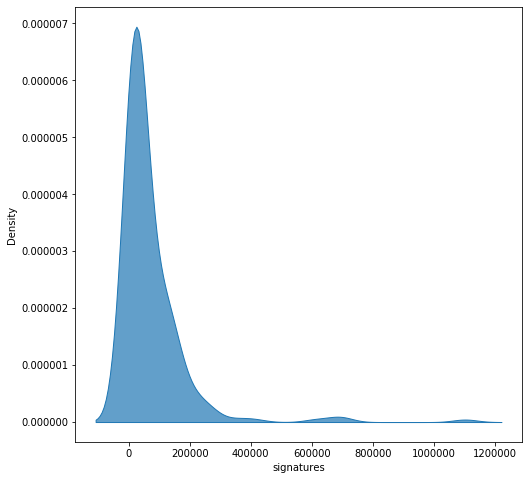

In [22]:
#visulaising distribution of petition data
plt.figure(figsize=(8, 8))
sns.kdeplot(x = 'signatures', data = df_all_petition, fill = True, alpha = .7)

In [23]:
#majority of petitions have between 10,000 - 200,000 signatures, with there being relatively few petitions that have a higer signature count than 200,000. 